### Modules used in this notebook
cartopy, xarray, eofs, numpy, matplotlib

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path

In [4]:
# Read geopotential height data using the xarray module. The file contains
# December-February averages of geopotential height at 500 hPa for the
# European/Atlantic domain (80W-40E, 20-90N).
z_djf = xr.open_dataset('../data/hgt_djf.nc')['z']
z_djf

c:\Users\matte\miniconda3\envs\cookbook\Lib\site-packages\xarray\coding\times.py:172: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.DataArray 'z' (time: 65, pressure: 1, latitude: 29, longitude: 49)> Size: 739kB
[92365 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 520B 1948-01-15T12:00:00 ... 2012-01-15T...
  * pressure   (pressure) float32 4B 500.0
  * latitude   (latitude) float32 116B 20.0 22.5 25.0 27.5 ... 85.0 87.5 90.0
  * longitude  (longitude) float32 196B -80.0 -77.5 -75.0 ... 35.0 37.5 40.0
Attributes:
    standard_name:  geopotential_height
    long_name:      DJF mean geopotential height

In [5]:

# Compute anomalies by removing the time-mean.
z_djf = z_djf - z_djf.mean(dim='time')

# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(z_djf.coords['latitude'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(z_djf, weights=wgts)

In [6]:
# Retrieve the leading EOF, expressed as the covariance between the leading PC
# time series and the input SLP anomalies at each grid point.
eof1 = solver.eofsAsCovariance(neofs=1)
eof1

<xarray.DataArray 'eofs' (mode: 1, pressure: 1, latitude: 29, longitude: 49)> Size: 11kB
array([[[[-3.45715595, -2.8913222 , -2.21818419, ..., -3.35261446,
          -3.9881012 , -4.49167407],
         [-5.8158014 , -5.27745326, -4.59830542, ..., -1.37381242,
          -2.24059083, -2.8956912 ],
         [-8.96890404, -8.50041711, -7.89011469, ...,  1.82563127,
           0.87479206,  0.15220646],
         ...,
         [22.86694679, 23.12904406, 23.4154917 , ..., 26.33127923,
          26.21734136, 26.09514277],
         [22.93872622, 23.03452279, 23.12615295, ..., 25.1408424 ,
          25.10653775, 25.09166447],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]]]])
Coordinates:
  * mode       (mode) int32 4B 0
  * pressure   (pressure) float32 4B 500.0
  * latitude   (latitude) float32 116B 20.0 22.5 25.0 27.5 ... 85.0 87.5 90.0
  * longitude  (longitude) float32 196B -80.0 -77.5 -75.0 ... 35.0 37.5 40.0
Attributes:
    long_name:  covariance_between_pcs_and_z

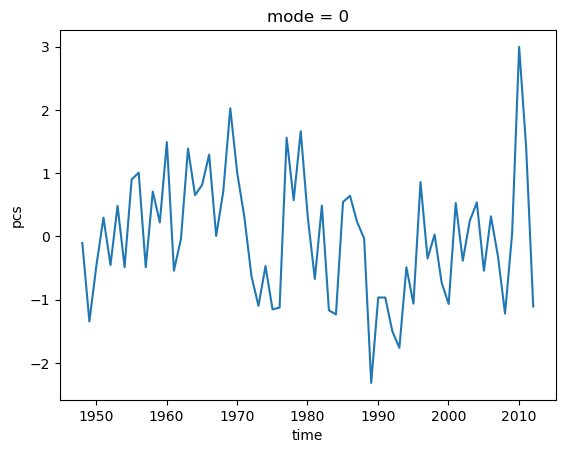

In [7]:
# A vedere il pattern penso il segno sia invertito, inverno 2010 infatti era molto negativo il NAO
pc1 = solver.pcs(npcs=1, pcscaling=1)
pc1.plot()

In [ ]:
eof1

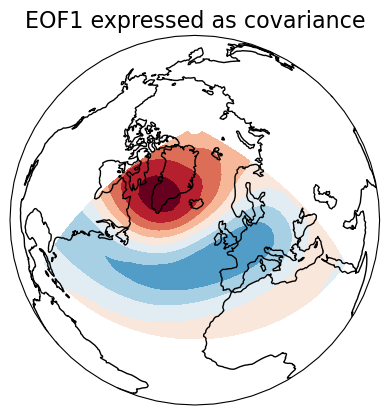

In [8]:
# Plot the leading EOF expressed as covariance in the European/Atlantic domain.
clevs = np.linspace(-75, 75, 11)
proj = ccrs.Orthographic(central_longitude=-20, central_latitude=60)
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
eof1[0, 0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                         transform=ccrs.PlateCarree(), add_colorbar=False)
ax.set_title('EOF1 expressed as covariance', fontsize=16)
plt.show()